<a href="https://colab.research.google.com/github/Halskii/Machine-Learning/blob/main/Cap4611_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf

In [ ]:
train_meta = pd.read_csv('assignment5_training_data_metadata.csv')
train_meta.head()

,id,image_name,label,cause,type
0,0,IM-0128-0001.jpeg,Normal,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,NaN,NaN


In [ ]:
test_meta = pd.read_csv('assignment5_test_data_metadata.csv')
test_meta.head()

,id,image_name
0,5309,IM-0021-0001.jpeg
1,5310,IM-0019-0001.jpeg
2,5311,IM-0017-0001.jpeg
3,5312,IM-0016-0001.jpeg
4,5313,IM-0015-0001.jpeg


## Creating our labels


In [ ]:
normal_lung_count = 0
virus_count = 0
bacteria_count = 0
stress_smoking_count = 0

for index in range(len(train_meta['label'])):
    if(train_meta['label'][index] == 'Normal'):
        normal_lung_count +=1 
    if(train_meta['label'][index] == 'Pnemonia'):
        if(train_meta['type'][index] == 'Virus'):
            train_meta['label'][index] = 'Virus'
            virus_count +=1
        elif(train_meta['type'][index] == 'bacteria'):
            train_meta['label'][index] = 'bacteria'
            bacteria_count +=1
        elif(train_meta['type'][index] == 'Stress-Smoking'):
            train_meta['label'][index] = 'Stress-Smoking'
            stress_smoking_count +=1

print("There are " + str(normal_lung_count) + " normal lungs") ; print() 
print("There are " + str(virus_count) + " pneumonia virus lungs") ; print()
print("There are " + str(bacteria_count) + " pneumonia bacteria lungs") ; print()
print("There are " + str(stress_smoking_count) + " pneumonia stress smoking lungs") ; print()

<ipython-input-4-0ae8d9ef5997>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_meta['label'][index] = 'Virus'
<ipython-input-4-0ae8d9ef5997>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_meta['label'][index] = 'bacteria'
There are 1342 normal lungs

There are 1407 pneumonia virus lungs

There are 2535 pneumonia bacteria lungs

There are 2 pneumonia stress smoking lungs

<ipython-input-4-0ae8d9ef5997>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

## Image preprocessing


In [ ]:
import PIL
import PIL.Image
import os

# Grabs the current working dirctory.
dir_path = os.getcwd()
train_image_dir_path = str(dir_path + '\\images\\train')
test_image_dir_path = str(dir_path + '\\images\\test')

# Shows the respective number of files for each directory.
print("Training Image Directory:")
print(train_image_dir_path) 
print(len(list(os.listdir(train_image_dir_path))), 'files found in directory')
print()

print("Testing Image Directory")
print(test_image_dir_path) 
print(len(list(os.listdir(test_image_dir_path))), 'files found in directory')


Training Image Directory:
c:\Users\jphal\OneDrive\Desktop\Spring 2021\Algorithms for Machine Learning\Assignment 5\images\train
5309 files found in directory

Testing Image Directory
c:\Users\jphal\OneDrive\Desktop\Spring 2021\Algorithms for Machine Learning\Assignment 5\images\test
624 files found in directory


## Let's make sure we don't have any undocumented images...

In [ ]:
from PIL import Image, ImageOps

training_directory_images = list(os.listdir(train_image_dir_path))
testing_directory_images = list(os.listdir(test_image_dir_path))

training_meta_images = list(train_meta['image_name'])
testing_meta_images = list(test_meta['image_name'])

In [ ]:
def remove_extra_images(image_dir_path, images, meta_images):
    for index in range(len(images)):
        if (images[index] not in meta_images):
            print('Removing Undocumented Image' + images[index])
            os.remove(image_dir_path + '\\' + images[index])


In [ ]:
remove_extra_images(train_image_dir_path, training_directory_images, training_meta_images)


Removing Undocumented Image1-s2.0-S0929664620300449-gr3_lrg-a.jpg
Removing Undocumented Image1-s2.0-S0929664620300449-gr3_lrg-b.jpg
Removing Undocumented Image1-s2.0-S0929664620300449-gr3_lrg-c.jpg
Removing Undocumented Image1-s2.0-S0929664620300449-gr3_lrg-d.jpg
Removing Undocumented Image191F3B3A-2879-4EF3-BE56-EE0D2B5AAEE3.jpeg
Removing Undocumented Image21DDEBFD-7F16-4E3E-8F90-CB1B8EE82828.jpeg
Removing Undocumented Image396A81A5-982C-44E9-A57E-9B1DC34E2C08.jpeg
Removing Undocumented Image3ED3C0E1-4FE0-4238-8112-DDFF9E20B471.jpeg
Removing Undocumented Image5083A6B7-8983-472E-A427-570A3E03DDEE.jpeg
Removing Undocumented Image66298CBF-6F10-42D5-A688-741F6AC84A76.jpeg
Removing Undocumented Image6A7D4110-2BFC-4D9A-A2D6-E9226D91D25A.jpeg
Removing Undocumented Image925446AE-B3C7-4C93-941B-AC4D2FE1F455.jpeg
Removing Undocumented ImageDE488FE1-0C44-428B-B67A-09741C1214C0.jpeg
Removing Undocumented ImageFC230FE2-1DDF-40EB-AA0D-21F950933289.jpeg
Removing Undocumented Imagejkms-35-e79-g001-l-

In [ ]:
remove_extra_images(test_image_dir_path, testing_directory_images, testing_meta_images)

## Creating the dataset

In [ ]:
from sklearn.model_selection import train_test_split

def makeDataset(directory, meta, target_size, isTrainingData):

    data = []
    labels = []

    for i in list(os.listdir(directory)):   
        image=tf.keras.preprocessing.image.load_img(directory + '//' +  i, color_mode='rgb', 
        target_size= (target_size))
        image=np.array(image)
        data.append(image)
    
        if(isTrainingData == True):
            row = meta.index[meta['image_name'] == str(i)].tolist()
            row = row[0]
            #print(row)
            if(meta['label'][row] == 'Normal'):
                labels.append(0)

            if(meta['label'][row] == 'Virus'):
                labels.append(1)
        
            if(meta['label'][row] == 'bacteria'):
                labels.append(2)
        
            if(meta['label'][row] == 'Stress-Smoking'):
                labels.append(3)

    data = np.array(data)
   
    if (isTrainingData == True):
        labels = np.array(labels)
        X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.2, random_state=42)
        return X_train, X_valid, y_train, y_valid

    else: return data


In [ ]:
X_train, X_valid, y_train, y_valid = makeDataset(train_image_dir_path, train_meta, (256, 256), isTrainingData=True)

In [ ]:
testing_images = makeDataset(test_image_dir_path, test_meta, (256, 256), isTrainingData=False)

In [ ]:
print("Tensorflow version: " + tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) ; print() ; print()

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

Tensorflow version: 2.4.1
Num GPUs Available:  1


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17968961962156818728
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9874664320
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11810579700932960446
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:0b:00.0, compute capability: 7.5"
]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_gen = ImageDataGenerator(
                                     horizontal_flip=True,
                                     rotation_range=.1, 
                                     zoom_range=.1
                                     )

In [ ]:

train_batches = train_image_gen.flow(X_train.reshape(4228, 256, 256, 3), y_train, 
                               shuffle=True, 
                               batch_size=64)
                               

val_batches = train_image_gen.flow(X_valid.reshape(1058, 256, 256, 3), y_valid,
                                  shuffle=True, 
                                  batch_size=64)
                                  
test_images = testing_images.reshape(624, 256, 256, 3)

## Building the model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()

model.add(Rescaling(1./255))
model.add(Conv2D(32,3,3, padding='same', input_shape=(256,256, 3), activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,3,3, padding='same', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,3,3, padding='same', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=4,  activation="softmax"))

opt = Adam(
   lr=.00005,
    decay=1e-3
    )

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt,
              loss=loss,
              metrics=["accuracy"])



In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import math
weights = compute_class_weight('balanced', np.unique(train_meta['label']), train_meta['label'])
weights = dict(zip(np.unique(range(0, 4)) , weights))

weights[1] = weights[2]
weights[2] = weights[3]
weights[3] = 0
print(weights) ; print()

{0: 0.9847242921013413, 1: 0.9392324093816631, 2: 0.521301775147929, 3: 0}

C:\Users\jphal\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=['Normal' 'Stress-Smoking' 'Virus' 'bacteria'], y=0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
5281     Virus
5282     Virus
5283     Virus
5284     Virus
5285     Virus
Name: label, Length: 5286, dtype: object as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Training the model

Note: This output is not the same as the output of the training that resulted in my highest score (presumably due to variation in the batches).

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

with tf.device("/GPU:0"):
   es = EarlyStopping(monitor='val_loss', mode='min', patience=6, restore_best_weights=True)
   history = model.fit(train_batches, class_weight=weights, validation_data=val_batches, epochs= 15)

Epoch 1/15
67/67 [==============================] - 50s 735ms/step - loss: 1.3174 - accuracy: 0.3741 - val_loss: 1.3535 - val_accuracy: 0.4386
Epoch 2/15
67/67 [==============================] - 48s 722ms/step - loss: 0.8000 - accuracy: 0.5517 - val_loss: 1.3124 - val_accuracy: 0.4792
Epoch 3/15
67/67 [==============================] - 48s 722ms/step - loss: 0.7162 - accuracy: 0.5618 - val_loss: 1.3151 - val_accuracy: 0.4660
Epoch 4/15
67/67 [==============================] - 48s 722ms/step - loss: 0.6307 - accuracy: 0.6154 - val_loss: 1.3296 - val_accuracy: 0.3752
Epoch 5/15
67/67 [==============================] - 48s 721ms/step - loss: 0.5947 - accuracy: 0.6292 - val_loss: 1.2910 - val_accuracy: 0.3771
Epoch 6/15
67/67 [==============================] - 48s 721ms/step - loss: 0.5799 - accuracy: 0.6406 - val_loss: 1.2839 - val_accuracy: 0.3875
Epoch 7/15
67/67 [==============================] - 48s 722ms/step - loss: 0.5835 - accuracy: 0.6485 - val_loss: 1.1815 - val_accuracy: 0.4159

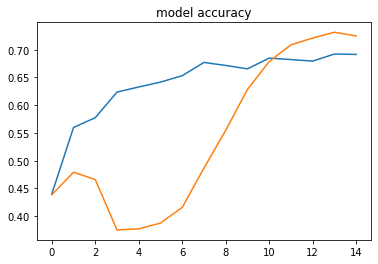

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.show()

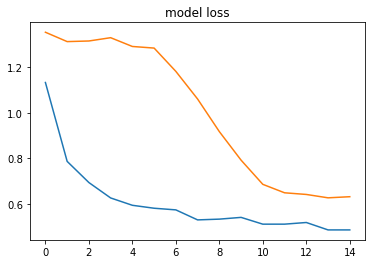

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.show()

In [ ]:
pred = np.argmax(model.predict(test_images), axis=-1)

output = pd.DataFrame({'id': test_meta.id, 'type': pred.astype(int) + 1})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,id,type
0,5309,2
1,5310,2
2,5311,1
3,5312,2
4,5313,1
...,...,...
619,5928,3
620,5929,3
621,5930,3
622,5931,3
